# Naive Fully Connected Neural Network

Here we train two Seprate MLP with (500,400,300) number of Units in the 3 hidden layer and try to predict **a** and **b**. Here we first resize the image to (200,200) size and then feed each pixel value into the Neural Net and solve the problem like a regression . Then we train the network with 100+ photos of *Victoria Memorial* and try to colorize a gray scale one. The result we get is no where near great , but still we can feel some sort of colorization . The sky part is somewhat blue , trees are somewhat green and the Monument itself is somewhat white in color . This not only the problem of the simplicity of the network , this sepia tone output has something to do with the framing of the problem as a regression one [What Richard Zhang also mentions]. 


In [3]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor as MLP
import os
import matplotlib.pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (16, 6)

Populating the interactive namespace from numpy and matplotlib


In [4]:
class Colorize():
    def __init__(self):
        self.clf_a=MLP(hidden_layer_sizes=(500,400,300),verbose=True,learning_rate='adaptive',tol=1e-9)
        self.clf_b=MLP(hidden_layer_sizes=(500,400,300),verbose=True,learning_rate='adaptive',tol=1e-9)
    
    def load_im(self,path):
        im=cv2.imread(path)
        im=cv2.resize(im,(200,200))
        l, a, b = cv2.split(cv2.cvtColor(im, cv2.COLOR_BGR2Lab))
        return l, a, b
    
    def load_dataset(self,folder='sample/train',size=50,randomize=True):
        X=[]
        Ya=[]
        Yb=[]
        for file in os.listdir(folder):
            l,a,b=self.load_im(folder+'/'+file)
            X.append(l.flatten())
            Ya.append(a.flatten())
            Yb.append(b.flatten())
        X=np.array(X)
        Ya=np.array(Ya)
        Yb=np.array(Yb)
        return X,Ya,Yb
    
    def train_MLP(self,X,Ya,Yb):
        print('Training MLP for a')
        self.clf_a.fit(X,Ya)
        print('Training MLP for b')
        self.clf_b.fit(X,Yb)
        print('Done Training')
        print('Loss a:',self.clf_a.loss_,'Loss b:',self.clf_b.loss_)
    
    def load_test_im(self,impath):
        im=cv2.imread(impath,0)
        im=cv2.resize(im,(200,200))
        im=im
        return im
    
    def predict_im(self,impath):
        im=self.load_test_im(impath)
        a=self.clf_a.predict(np.array([im.flatten()]))
        b=self.clf_b.predict(np.array([im.flatten()]))
        a=a.reshape((200,200))
        b=b.reshape((200,200))
        res=np.zeros((200,200,3))
        return im,a,b

In [5]:
c=Colorize()
X,Ya,Yb=c.load_dataset()
c.train_MLP(X,Ya,Yb)

Training MLP for a
Iteration 1, loss = 7620.08232342
Iteration 2, loss = 14835.49605373
Iteration 3, loss = 5079.90490436
Iteration 4, loss = 3473.85455480
Iteration 5, loss = 1778.23686307
Iteration 6, loss = 1476.85231250
Iteration 7, loss = 1081.07170530
Iteration 8, loss = 805.55285597
Iteration 9, loss = 606.40775204
Iteration 10, loss = 576.50243419
Iteration 11, loss = 427.08093800
Iteration 12, loss = 389.52209121
Iteration 13, loss = 341.85718102
Iteration 14, loss = 287.60505636
Iteration 15, loss = 251.12654457
Iteration 16, loss = 224.46928793
Iteration 17, loss = 234.74492862
Iteration 18, loss = 316.80779998
Iteration 19, loss = 420.09697129
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
Training MLP for b
Iteration 1, loss = 9225.02249168
Iteration 2, loss = 10774.67930593
Iteration 3, loss = 3972.51461708
Iteration 4, loss = 3595.91096106
Iteration 5, loss = 1628.10048935
Iteration 6, loss = 1504.97040780
Iteration 7, loss = 1

In [7]:
im,a,b=c.predict_im('sample/test/fie6.jpg')
res=np.zeros((200,200,3),dtype=np.uint8)
res[:,:,0]=(im).astype(np.uint8)
res[:,:,1]=(a).astype(np.uint8)
res[:,:,2]=(b).astype(np.uint8)
colorized=cv2.cvtColor(res,cv2.COLOR_Lab2RGB)

im_original=cv2.imread('sample/test/fie6.jpg')
im_original=cv2.resize(im_original,(200,200))
im_original=cv2.cvtColor(im_original,cv2.COLOR_BGR2RGB)

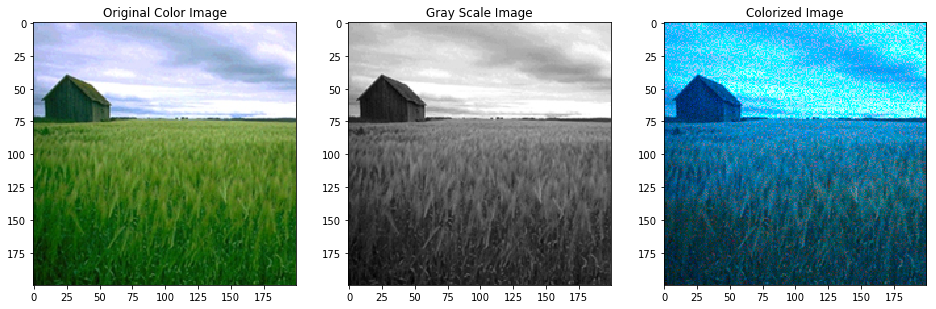

In [8]:
plt.subplot(1,3,1)
plt.imshow(im_original,cmap='gray')
plt.title('Original Color Image')
plt.subplot(1,3,2)
plt.imshow(im,cmap='gray')
plt.title('Gray Scale Image')
plt.subplot(1,3,3)
plt.imshow(colorized)
plt.title('Colorized Image')
plt.savefig('naive_fnet.png')
plt.show()